#  Landscaping Analysis - Data Visualization for business improvement insights
## Arun Prasadh K


Import Pandas, matplotlib, widgets and seaborn. Read the required csv files that contains the data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
sns.set(style='darkgrid')

In [5]:
calendar = pd.read_csv('Datasets/calendar.csv')
employees = pd.read_csv('Datasets/employees.csv')
landscaping = pd.read_csv('Datasets/landscaping.csv')

## Main goal: What are the possible areas of improvement for the Company?

Here we will explore the given data for possible improvements in revenue streams of the
Company and improve customer satisfaction.
To achieve our main goal, we will work on the following sub-goals:

1. Understanding the revenue breakdown and establishing the logic if there is a pattern.
2. Is the Company utilizing all its resources judicially (Such as the lead time between the requested date and completion date, employee work schedules)?
3. In addition, we will also explore if there is any correlation between customer satisfaction, lead time and their geographic location


## 1. What is the current percentage/amount of revenue and costs based on the invoice amount?  

This is an explanatory plot that depicts how slim the current margins are after accounting for
the material and labor costs. The company makes just over 4% of the overall invoice amount.
The takeaway from this plot is how slim the margins are currently. This will lead up to our next
plot, where we break down the revenue by customer and the job type.

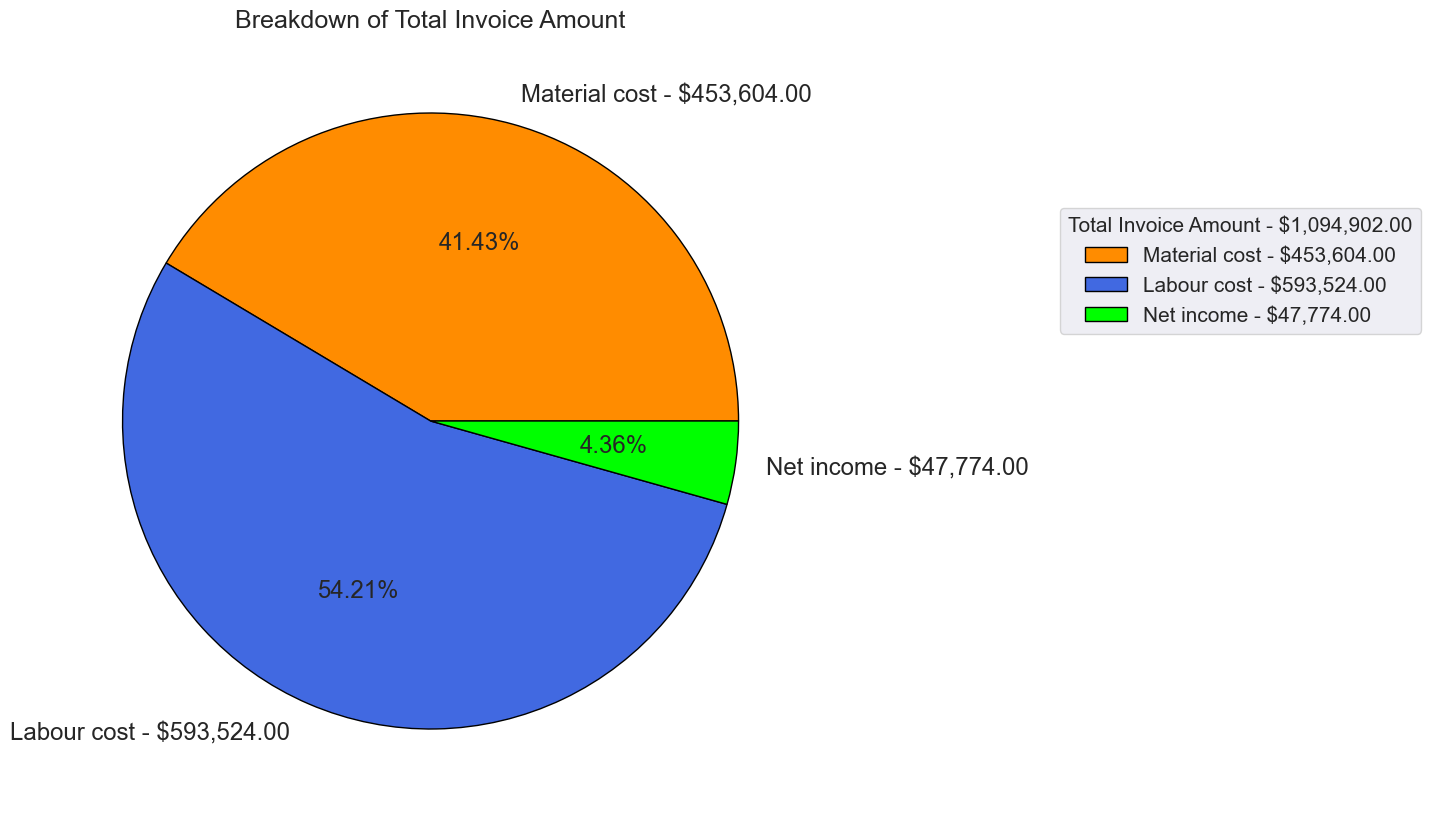

In [6]:
# Get the overall cost breakdown
total_invoice = landscaping['invoice_amount'].sum()


material_cost = landscaping['material_costs'].sum()
material_cost = int(material_cost)

# get the hours worked by each employee
emp_hours = calendar.count()
emp_hours = emp_hours.tail(-1)

# create a dataframe with employee id and hours worked
emp_hours = pd.DataFrame(emp_hours)
emp_hours = emp_hours.reset_index()
emp_hours.columns =['employee_id', 'hours']

# merge the hours worked with the employees dataframe
employee_wages = pd.merge(employees,emp_hours)

# update the dataframe with total wage based on hours*wage*8
# considering 8 hours as a standard work day
employee_wages['hours_worked'] = ((employee_wages['hourly_wage'] * employee_wages['hours']) * 8)

labour_cost = employee_wages['hours_worked'].sum()

# revenue is calculated as the total_invoice - [material_cost + labour_cost]
revenue = int(total_invoice - [material_cost + labour_cost])

# color = ['darkorange','royalblue','limegreen']
color = ['#FF8C00','#4169E1','#00FF00']
data = [material_cost,labour_cost,revenue]
labels = ['Material cost - $453,604.00','Labour cost - $593,524.00 ','Net income - $47,774.00']
fig,ax = plt.subplots(figsize =(15, 10))
ax.pie(data, labels = labels, colors = color, autopct='%1.2f%%',wedgeprops= {"edgecolor":"black",
                     'linewidth': 1,
                     'antialiased': True},
                      textprops={'size': 'x-large'})
plt.title ('Breakdown of Total Invoice Amount', fontsize = 18)
plt.legend(loc = 'lower right', title = 'Total Invoice Amount - $1,094,902.00',title_fontsize=15,fontsize=  15,bbox_to_anchor=(1.7, 0.6, 0.1, 1.2))
plt.show()

## 2. Breakdown of revenue by the job type or customer type  

Interactive Plot  

● This can give the Company an insight into its future by either focusing on a certain job
type or customer type.  

● This plot will also let the company explore ways in which they can reduce expenses,
either on material costs or labor costs.  

The interactive element here is a drop-down that lets the user select the expense breakdown
based on customer type (residential/commercial) or job type( 11 categories).

In [7]:
# Here we derive data for the customer type filter
emp = employees.copy(deep=True)
daily_wage = emp['hourly_wage'] * 8
emp['daily_wage'] = daily_wage
emp
customer_types = landscaping['customer_type'].drop_duplicates()
customer = []
# for a given customer type, filter the jobs and retrieve the employees that worked on the given job
for customer_type in customer_types:
    cust = landscaping[landscaping['customer_type'] == customer_type]
    cust = cust['job_id']
    cust = calendar.isin(list(cust))
    cust = cust.sum().reset_index()
    cust = cust.tail(-1)
    cust.rename(columns = {'index':'employee_id',0:'Days'}, inplace =True)
    cust_emps = emp.copy()
    cust_emps = cust_emps.merge(cust, how='right', on='employee_id')
    cust_emps['Labor_cost'] = cust_emps['daily_wage'] * cust_emps['Days']
    cust_costs = cust_emps['Labor_cost'].sum()
    cust.drop
    cust_emps.drop
# we get the sum of labor cost for a given customer type    
    customer.append(cust_costs)
customer    

[389428.0, 204096.0]

In [8]:
# group the other costs by customer type
Cust_invoice = landscaping.groupby(by='customer_type')[['invoice_amount','material_costs']].sum()
Cust_invoice = Cust_invoice.reset_index()
Cust_invoice



,customer_type,invoice_amount,material_costs
0,commercial,422166.0,169564
1,residential,672736.0,284040


In [9]:
# merge all the costs
df_cust = pd.DataFrame(customer, columns=['Labor_cost'])
customer_types = customer_types.to_list()
df_cust['customer_type'] = customer_types
cust_invoice = Cust_invoice.merge(df_cust, how='right', on='customer_type')

# calculate the revenue based on customer type
cust_invoice['revenue'] = (cust_invoice['invoice_amount'] - (cust_invoice['material_costs'] + cust_invoice['Labor_cost']))
cust_invoice

,customer_type,invoice_amount,material_costs,Labor_cost,revenue
0,residential,672736.0,284040,389428.0,-732.0
1,commercial,422166.0,169564,204096.0,48506.0


In [10]:
Job_invoice = landscaping.groupby(by='job_type')[['invoice_amount','material_costs']].sum()
Job_invoice = Job_invoice.reset_index()
Job_invoice

,job_type,invoice_amount,material_costs
0,basic_lawncare,128242.5,32527
1,complete_lawncare,112289.5,36433
2,fall_planting,13760.0,5027
3,garden_beds,98060.0,33592
4,garden_landscaping,152690.0,53905
5,install_new_lawn,155880.0,97561
6,lawn_treatment,36690.0,13687
7,retaining_wall,108620.0,61421
8,spring_cleanup,40710.0,10349
9,tree_pruning,51970.0,13313


In [11]:
emp = employees.copy(deep=True)
daily_wage = emp['hourly_wage'] * 8
emp['daily_wage'] = daily_wage
# list the unique job types
job_types = landscaping['job_type'].drop_duplicates()

results = []
for job_type in job_types:
    job = landscaping[landscaping['job_type'] == job_type]
    job = job['job_id']
    job = calendar.isin(list(job))
    job = job.sum().reset_index()
    job = job.tail(-1)
    job.rename(columns = {'index':'employee_id',0:'Days'}, inplace =True)
    job_emps = emp.copy()
    job_emps = job_emps.merge(job, how='right', on='employee_id')
    job_emps['Labor_cost'] = job_emps['daily_wage'] * job_emps['Days']
    job_costs = job_emps['Labor_cost'].sum()
    job.drop
    job_emps.drop
    results.append(job_costs)
    
# merge all costs    
df = pd.DataFrame(results, columns=['Labor_cost'])
job_types = job_types.to_list()
df['job_type'] = job_types


job_invoice = Job_invoice.merge(df, how='right', on='job_type')


In [12]:
job_invoice['revenue'] = (job_invoice['invoice_amount'] - (job_invoice['material_costs'] + job_invoice['Labor_cost']))
job_invoice

,job_type,invoice_amount,material_costs,Labor_cost,revenue
0,basic_lawncare,128242.5,32527,79328.0,16387.5
1,garden_landscaping,152690.0,53905,101396.0,-2611.0
2,lawn_treatment,36690.0,13687,22048.0,955.0
3,spring_cleanup,40710.0,10349,25632.0,4729.0
4,retaining_wall,108620.0,61421,49472.0,-2273.0
5,water_feature,195990.0,95789,102476.0,-2275.0
6,complete_lawncare,112289.5,36433,70256.0,5600.5
7,garden_beds,98060.0,33592,49116.0,15352.0
8,install_new_lawn,155880.0,97561,50528.0,7791.0
9,tree_pruning,51970.0,13313,36484.0,2173.0


In [13]:
job_types = (['Basic Lawncare',
'Complete Lawncare',
'Fall Planting',
'Garden Beds',
'Garden Landscaping',
'Install New Lawn',
'Lawn Treatment',
'Retaining Wall',
'Spring Cleanup',
'Tree Pruning',
'Water Feature'])

In [14]:
types = ['Customer Type', 'Job Type']

# Define a function on the variable filter
@interact(filter = types)
def f(filter):
    
    global cust_invoice, job_invoice 
    color = ['#FF0000','#FF8C00','#4169E1','#00FF00']
    sns.set(style='darkgrid')
#     filter on 'Job type'
    if (filter == 'Job Type'):   
        fig,ax = plt.subplots(figsize=(15,12))
        df_melt = pd.melt(job_invoice, id_vars=['job_type'], value_vars=['invoice_amount', 'material_costs', 'Labor_cost', 'revenue'])
        # create the stacked bar chart
        
        sns.barplot(y='job_type', x='value', hue='variable', data=df_melt,palette= color,  edgecolor='black')
        plt.title('Revenue Breakdown by Job Type',fontsize = 18)
        plt.xlabel('Revenue Breakdown',fontsize = 15)
        ax.set_yticklabels(job_types,fontsize = 12)
        ax.set_ylabel('Job Type',fontsize = 15)
        # plt.ylabel('Costs')
        plt.xlim(-20000,250000)
        plt.legend(title='Invoice Breakdown', loc='upper right')
        for i, bar in enumerate(ax.containers):
            ax.bar_label(bar, label=f"${df_melt['value'][i]:,.0f}", label_type='edge', padding = 10)
        plt.show()
# filter on customer type        
    elif (filter == 'Customer Type'):   
        fig,ax = plt.subplots(figsize=(10,8))
        df_melt = pd.melt(cust_invoice, id_vars=['customer_type'], value_vars=['invoice_amount', 'material_costs', 'Labor_cost', 'revenue'])
        # create the stacked bar chart
        
        sns.barplot(y='customer_type', x='value', hue='variable', data=df_melt, palette= color, edgecolor='black')
        plt.title('Revenue Breakdown by Customer Type',fontsize = 18)
        plt.xlabel('Revenue Breakdown',fontsize = 15)
        plt.ylabel('Customer Type',fontsize = 15)
        ax.set_yticklabels(('Residential','Commercial'),fontsize = 12)
        # plt.yticks(,fontsize = 15)
        plt.xlim(-80000,800000)
        plt.legend(title='Invoice Breakdown', loc='lower right')
        for i, bar in enumerate(ax.containers):
            ax.bar_label(bar, label=f"${df_melt['value'][i]:,.0f}", label_type='edge', padding = 10)
        plt.show()     

interactive(children=(Dropdown(description='filter', options=('Customer Type', 'Job Type'), value='Customer Ty…


## 3. Does the time taken to start the job affect the customer perception/satisfaction?

This exploratory plot shows the distribution of customer rating across various types of jobs and the time taken to start a job from the date of
request is represented based on the size of the marker, this aims to provide an insights into how better can the schedule/utilization of employees be managed and why certain jobs are started in a short duration while others take longer time to start  
We also use a pointplot to show the standard deviation of the customer rating

In [15]:
# Create a dataframe from the landscaping dataframe
lead_time = landscaping.copy(deep=True)
# convert the date format and calculate days
lead_time['start_date'] = pd.to_datetime(landscaping['start_date'])
lead_time['request_date'] = pd.to_datetime(landscaping['request_date'])
lead_time['Days taken to start work'] = (lead_time['start_date'] - lead_time['request_date']).dt.days
# rename column names as required
lead_time.rename(columns = {'job_type':'Job Type','difference':'Days taken to start work'}, inplace =True)
lead_time['Job Type'] = lead_time['Job Type'].str.replace('_',' ')

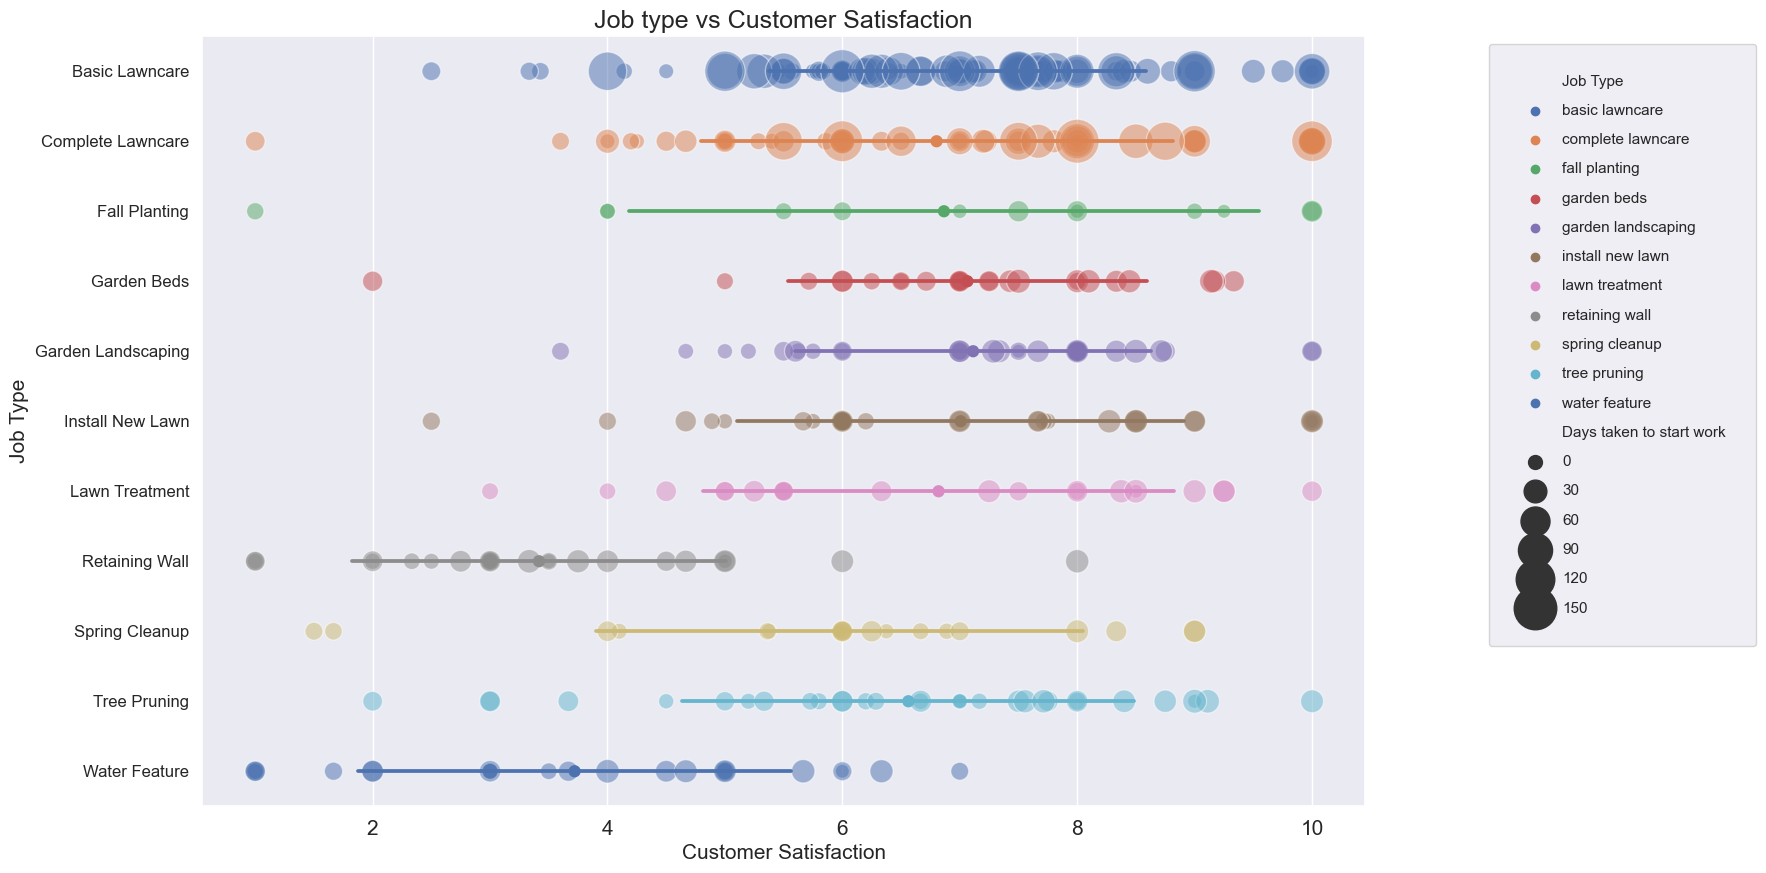

In [16]:
# Pivot the data on customer rating, job type and lead time
data = pd.pivot_table(lead_time, values = 'customer_satisfaction', index=['Job Type','Days taken to start work']).reset_index()
# variables for ease of use
x = data['customer_satisfaction']
y = data['Job Type']
z = data['Days taken to start work']
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(15,10))
# use scatterplot and pointplot
ax1 = sns.scatterplot(data, x = x,y =y, 
                      size = z, hue = y, 
                      sizes=(100, 1000),
                      alpha = 0.5,palette="deep", legend = 'auto')

sns.pointplot(x=x, y=y, data = data, errorbar ='sd',palette="deep", ax= ax1)
ax1.legend(bbox_to_anchor=(1.1,1), loc=2,labelspacing = 1,borderpad = 2)
plt.title( 'Job type vs Customer Satisfaction', fontsize = 18)
ax.set_yticklabels(job_types,fontsize = 12)
ax.set_ylabel('Job Type',fontsize = 15)
ax.set_xlabel('Customer Satisfaction',fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

## 4. Does the geographical location of the customer affect the customer satisfaction or the Lead time?

The below heatmap aims to establish if there is an  underlying pattern to the geographical location of the customer and their satisfaction rating.
We also compare the mean of the time taken to start the work based on the geographical location of the customer 

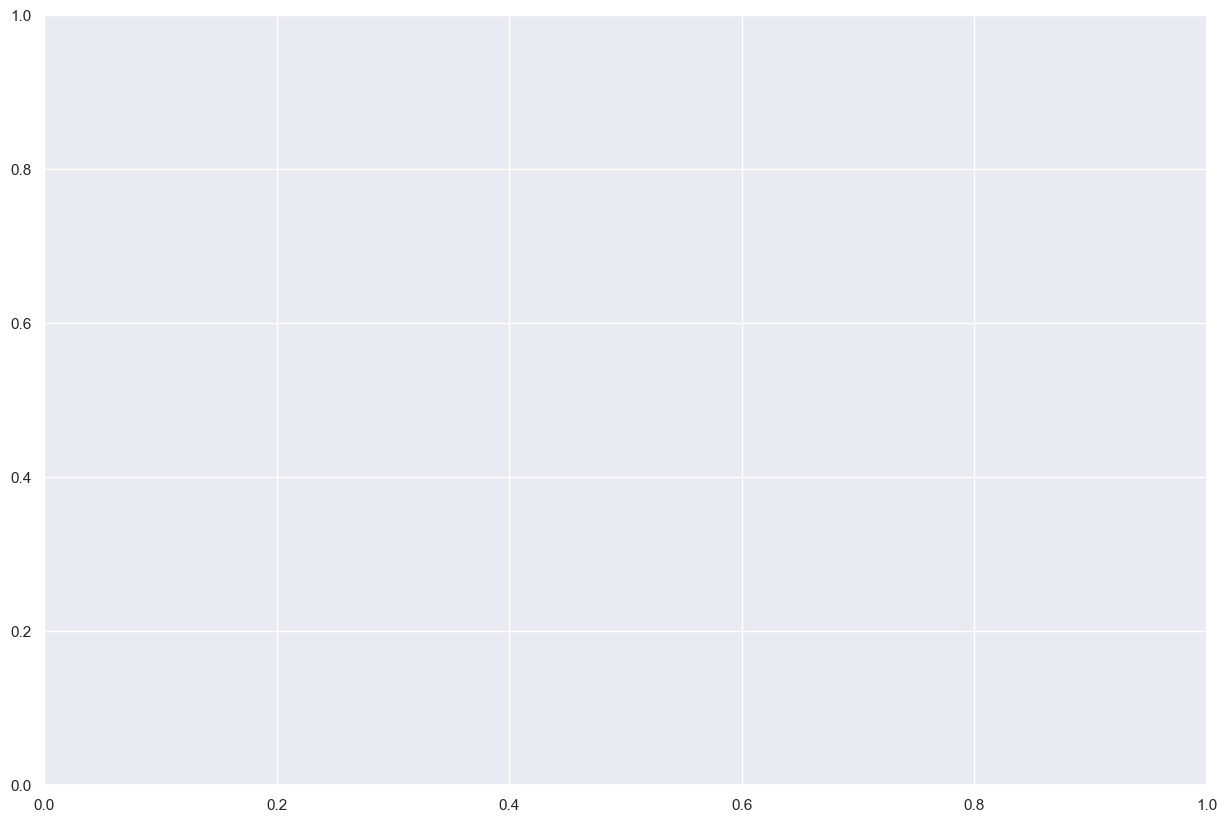

interactive(children=(Dropdown(description='filter', options=('Customer Satisfaction', 'Days taken to start wo…

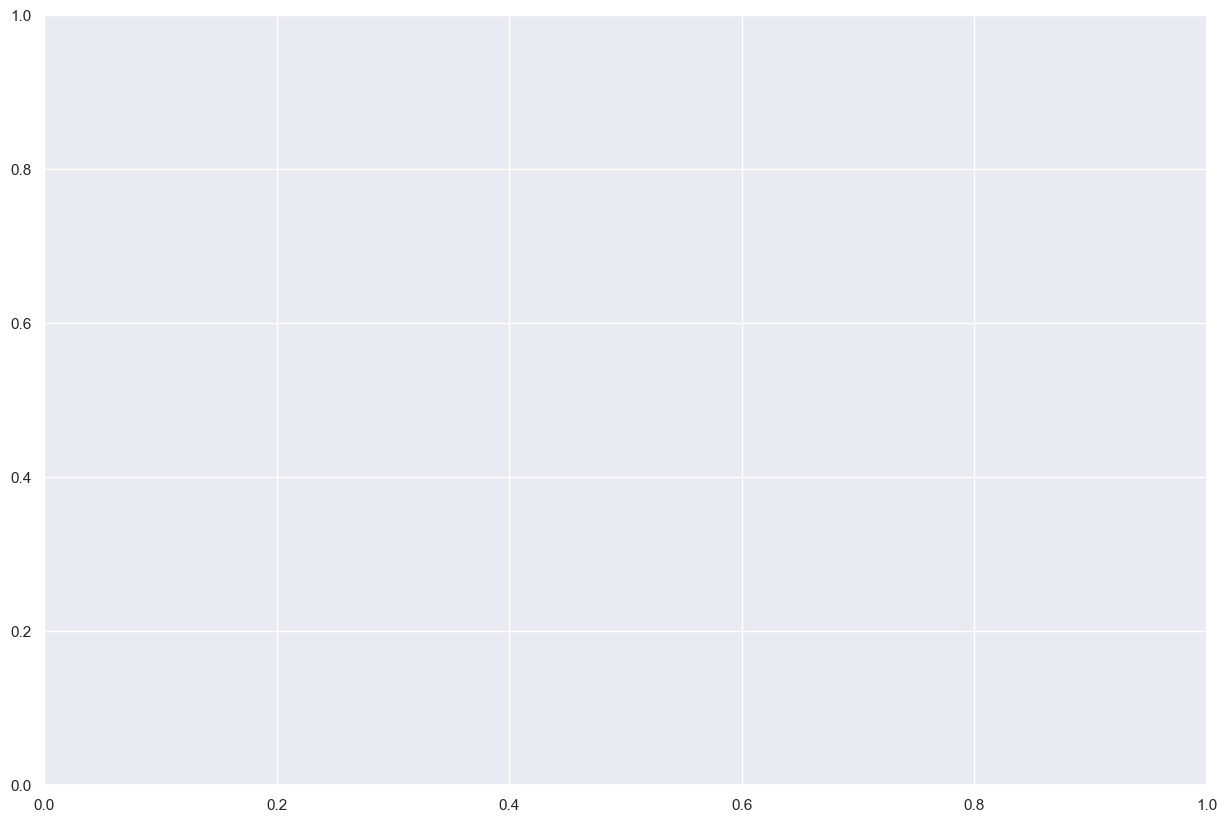

In [18]:
# Copy the lead time dataset
geo_data = lead_time.copy(deep=True)
# select specific columns and group as required
geo_data = geo_data[['Job Type','customer_postal_code','customer_satisfaction','Days taken to start work']]
geo_data = geo_data.groupby(['Job Type','customer_postal_code']).mean().reset_index()
# Create list for the drop-down values
types = ['Customer Satisfaction', 'Days taken to start work']

# Define a function on the variable filter
@interact(filter = types)
def f(filter):
    #   access the dataframe globally  
    global geo_data 
    fig, ax = plt.subplots(figsize=(15,10))
#     filter on 'Lead time'
    if (filter == 'Days taken to start work'):     
        invoice = geo_data
#       Pivot on 'job_type','customer_postal_code','invoice_amount'
        invoice = invoice.pivot(index='Job Type', columns='customer_postal_code', values='Days taken to start work')
#       fillna with  0's
        invoice = invoice.fillna(0)
#       sum the invoice on both axes, sort and rewrite the dataframe    
        rows = invoice.sum(axis=1)
        cols = invoice.sum(axis=0)
        invoice = invoice.loc[rows.sort_values(ascending=False).index,cols.sort_values(ascending=False).index]
        sns.heatmap(invoice, cmap = 'mako',annot=True,fmt=".1f",annot_kws={"fontsize":15})
        ax.set_yticklabels(job_types,fontsize = 12)
        ax.set_ylabel('Job Type',fontsize = 15)
        ax.set_xlabel('Customer Postal Code',fontsize = 15)
        plt.title( 'Customer Location vs Days taken to start work', fontsize = 18)
        plt.show()
#     filter on 'Customer Satisfaction'     
    elif (filter == 'Customer Satisfaction'):
        customer = geo_data
#       Pivot on 'job_type','customer_postal_code','customer_satisfaction'        
        customer = customer.pivot(index='Job Type',columns='customer_postal_code',values='customer_satisfaction')
#       fillna with  0's    
        customer =customer.fillna(0)
#       sum the customer rating on both axes, sort and rewrite the dataframe    
        rows = customer.sum(axis=1)
        cols = customer.sum(axis=0)
        customer = customer.loc[rows.sort_values(ascending=False).index,cols.sort_values(ascending=False).index]
        sns.heatmap(customer, cmap = 'mako',annot=True,annot_kws={"fontsize":15})
        ax.set_yticklabels(job_types,fontsize = 12)
        ax.set_ylabel('Job Type',fontsize = 15)
        ax.set_xlabel('Customer Postal Code',fontsize = 15)
        plt.title( 'Customer Location vs Customer Satisfaction', fontsize = 18)
        plt.show()
